# Support Vector Machine - Kernel

In [53]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.svm import LinearSVC, SVC
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
import pandas as pd

In [54]:
X, y = make_classification(n_samples=2000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2,n_clusters_per_class=2,
                           random_state=32)



In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1,stratify=y)

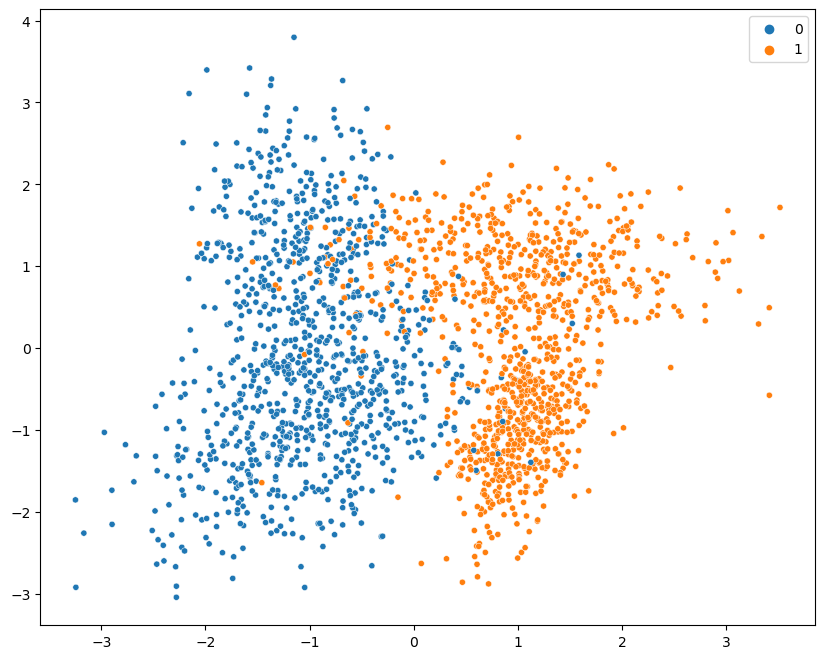

In [56]:
plt.figure(figsize=(10, 8))
# Plotting our two-features-space
sns.scatterplot(x=X_train[:, 0], 
                y=X_train[:, 1], 
                hue=y_train, 
                s=20);
plt.show()

In [57]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)
Xkernel = pd.concat([X,y],axis=1, ignore_index=True)
Xkernel.to_csv('Xkernel.csv',index = False)

In [58]:
svc_model = SVC(gamma=1, C=10)
svc_model.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [59]:
y_pred = svc_model.predict(X_test)

In [60]:
# margin = 2/np.sqrt(svc_model.coef_[0].T@svc_model.coef_[0])
# print(margin)
# print(svc_model.score(X_train,y_train))

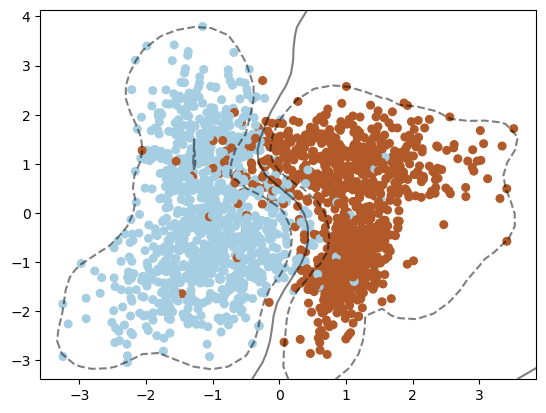

In [61]:
X = np.array(X_train)
plt.scatter(X[: ,0], X[: ,1], c=y_train, s=30, cmap=plt.cm.Paired)
ax = plt.gca()

xlim = ax.get_xlim()
ylim = ax.get_ylim()
# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc_model.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
# ax.scatter(svc_model.support_vectors_[:, 0], svc_model.support_vectors_[:, 1], s=100,
#            linewidth=1, facecolors='none')
plt.show()

In [ ]:
C_range = np.logspace(-2, 10, 5)
gamma_range = np.logspace(-9, 3, 5)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print(
    "The best parameters are %s with a score of %0.2f"
    % (grid.best_params_, grid.best_score_)
)